In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
chelsea_df = pd.read_csv('epl-dataset/chelsea.csv')
chelsea_df.head(5)

,home_team,away_team,home_team_possession_%,home_team_shots_on_target,home_team_shots,home_team_touches,home_team_passes,home_team_tackels,home_team_clearances,home_team_corners,...,away_team_shots,away_team_touches,away_team_passes,away_team_tackels,away_team_clearances,away_team_corners,away_team_offsides,away_team_yellow_cards,away_team_foul_conceded,result
0,Nottingham Forest,Chelsea,27.7,5.0,12,432,256,18,15,1,...,7,867,697,16,18,2,2,2,14,"Full-time Match ends, Nottingham Forest 1, Che..."
1,Chelsea,Bournemouth,Chelsea,60.3,5,15,741,563,18,24,...,4,9,535,357,18,15,8,0,10,"Full-time Match ends, Chelsea 2, Bournemouth 0."
2,Newcastle United,Chelsea,48.9,3.0,10,635,451,23,13,5,...,5,668,471,23,20,3,0,2,11,"Full-time Match ends, Newcastle United 1, Chel..."
3,Chelsea,Arsenal,44.3,1.0,5,536,360,24,19,4,...,14,662,452,17,22,6,0,2,13,"Full-time Match ends, Chelsea 0, Arsenal 1."
4,Brighton and Hove Albion,Chelsea,Brighton,41.0,9,19,544,349,18,21,...,7,15,707,513,8,16,7,2,6,"Full-time Match ends, Brighton and Hove Albion..."


In [19]:
end_scores_df = chelsea_df['result']
end_scores_df.head(5)


21

In [20]:
# get the scores of both teams
import re
pattern = r'([A-Za-z\s]+) (\d+), ([A-Za-z\s]+) (\d+)'

match = re.search(pattern, end_scores_df[0])
home_team_score = int(match.group(2))
away_team_score = int(match.group(4))
goal_difference = abs(home_team_score - away_team_score)

# find the winner, loser, and draw
if home_team_score > away_team_score:
    result = match.group(1)
    
elif home_team_score < away_team_score:
    result = match.group(3)
    
else:
    result = 'Draw'
    
print(result)


Draw


In [21]:
# create the function
pattern = r'([A-Za-z\s]+) (\d+), ([A-Za-z\s]+) (\d+)'
home_team_scores = []
away_team_scores = []
goal_differences = []
results = []

for i in range(len(end_scores_df)):
    match = re.search(pattern, end_scores_df[i])
    home_team_score = int(match.group(2))
    away_team_score = int(match.group(4))
    goal_difference = abs(home_team_score - away_team_score)

    # find the winner, loser, and draw
    if home_team_score > away_team_score:
        result = match.group(1)

    elif home_team_score < away_team_score:
        result = match.group(3)

    else:
        result = 'Draw'

    home_team_scores.append(home_team_score)
    away_team_scores.append(away_team_score)
    goal_differences.append(goal_difference)
    results.append(result)
    


In [26]:
# add the new columns to the dataframe
chelsea_df['home_team_score'] = home_team_scores
chelsea_df['away_team_score'] = away_team_scores
chelsea_df['goal_difference'] = goal_differences
chelsea_df['result'] = results

In [78]:
chelsea_df.head(2)

,home_team,away_team,home_team_possession_%,home_team_shots_on_target,home_team_shots,home_team_touches,home_team_passes,home_team_tackels,home_team_clearances,home_team_corners,...,away_team_tackels,away_team_clearances,away_team_corners,away_team_offsides,away_team_yellow_cards,away_team_foul_conceded,result,home_team_score,away_team_score,goal_difference
0,Nottingham Forest,Chelsea,27.7,5.0,12,432,256,18,15,1,...,16,18,2,2,2,14,Draw,1,1,0
1,Chelsea,Bournemouth,Chelsea,60.3,5,15,741,563,18,24,...,357,18,15,8,0,10,Chelsea,2,0,2


In [65]:
# remove spaces from column names in the dataframe
chelsea_df.columns = chelsea_df.columns.str.strip()

# chelsea home and away dataframes
chelsea_home_df = chelsea_df[(chelsea_df['home_team']=='Chelsea')]
# reset the index
chelsea_home_df.reset_index(inplace=True, drop=True)

chelsea_away_df = chelsea_df[(chelsea_df['away_team']=='Chelsea')]
chelsea_away_df.reset_index(inplace=True, drop=True)

In [70]:
# remove spaces from result column
chelsea_home_df.loc[:,'result'] = chelsea_home_df['result'].str.strip() 
chelsea_away_df.loc[:,'result'] = chelsea_away_df['result'].str.strip() 



'Chelsea'

## 1. Home vs Away in terms of wins, draws, and losses

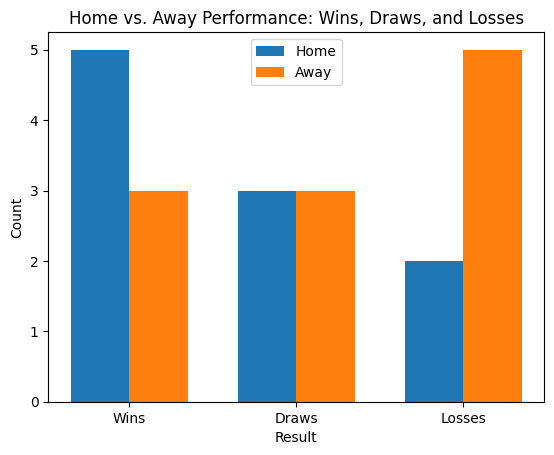

In [81]:
# Home vs Away in terms of wins, draws, and losses
home_wins = chelsea_home_df['result'].value_counts()['Chelsea']
home_draws = chelsea_home_df['result'].value_counts()['Draw']
home_losses = len(chelsea_home_df) - (home_wins + home_draws)

away_wins = chelsea_away_df['result'].value_counts()['Chelsea']
away_draws = chelsea_away_df['result'].value_counts()['Draw']
away_losses = len(chelsea_away_df) - (away_wins + away_draws)

# visualize the results
import matplotlib.pyplot as plt
# Define labels and data
labels = ['Wins', 'Draws', 'Losses']
home_data = [home_wins, home_draws, home_losses]
away_data = [away_wins, away_draws, away_losses]

# Plotting bar plots
fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35
bar_positions_home = range(len(labels))
bar_positions_away = [pos + bar_width for pos in bar_positions_home]

ax.bar(bar_positions_home, home_data, width=bar_width, label='Home')
ax.bar(bar_positions_away, away_data, width=bar_width, label='Away')

# Adding labels and title
ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Home vs. Away Performance: Wins, Draws, and Losses')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_home])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()




## 2. Home vs Away in terms of goals scored and conceded

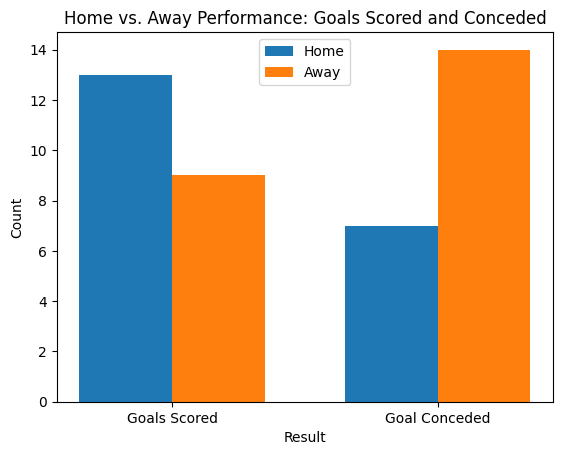

In [82]:
# Home vs Away in terms of goals scored
home_goals_scored = chelsea_home_df['home_team_score'].sum()
home_goals_conceded = chelsea_home_df['away_team_score'].sum()

away_goals_scored = chelsea_away_df['away_team_score'].sum()
away_goals_conceded = chelsea_away_df['home_team_score'].sum()

# define labels and data
labels = ['Goals Scored', 'Goal Conceded']
home_data = [home_goals_scored, home_goals_conceded]
away_data = [away_goals_scored, away_goals_conceded]

fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35
bar_positions_home = range(len(labels))
bar_positions_away = [pos + bar_width for pos in bar_positions_home]

ax.bar(bar_positions_home, home_data, width=bar_width, label='Home')
ax.bar(bar_positions_away, away_data, width=bar_width, label='Away')

# Adding labels and title
ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Home vs. Away Performance: Goals Scored and Conceded')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_home])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

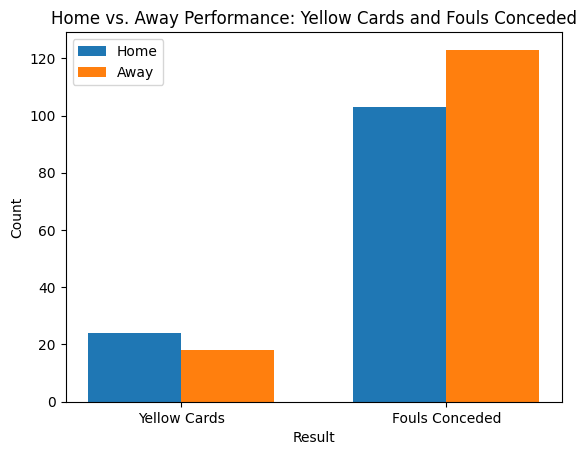

In [84]:
#  Discipline metrics: home vs away
home_yellow_cards = chelsea_home_df['home_team_yellow_cards'].sum()
home_fouls = chelsea_home_df['home_team_foul_conceded'].sum()

away_yellow_cards = chelsea_away_df['away_team_yellow_cards'].sum()
away_fouls = chelsea_away_df['away_team_foul_conceded'].sum()

# define labels and data
labels = ['Yellow Cards', 'Fouls Conceded']
home_data = [home_yellow_cards, home_fouls]
away_data = [away_yellow_cards, away_fouls]

fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35
bar_positions_home = range(len(labels))
bar_positions_away = [pos + bar_width for pos in bar_positions_home]

ax.bar(bar_positions_home, home_data, width=bar_width, label='Home')
ax.bar(bar_positions_away, away_data, width=bar_width, label='Away')

# Adding labels and title
ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Home vs. Away Performance: Yellow Cards and Fouls Conceded')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_home])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

### This is interesting. So, Chelsea did concede more fouls  in away games, but had less yellow cards!

In [ ]:
# shots on target metrics: home vs away
home_shots_on_target = chelsea_home_df['home_team_shots_on_target'].mean()
home_shots = chelsea_home_df['home_team_shots'].mean()
percent_home_shots_on_target = home_shots_on_target / home_shots

away_shots_on_target = chelsea_away_df['away_team_shots_on_target'].mean()
away_shots = chelsea_away_df['away_team_shots'].mean()
percent_away_shots_on_target = away_shots_on_target / away_shots



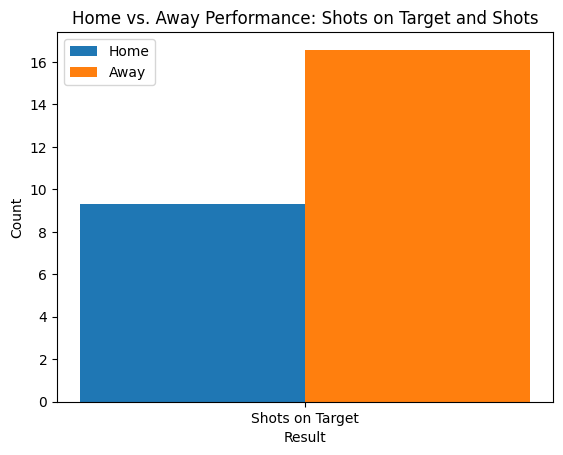

In [90]:
# shots on target metrics: home vs away
# define labels and data
labels = ['Shots on Target']
home_data = home_shots_on_target
away_data = away_shots_on_target

fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35
bar_positions_home = range(len(labels))
bar_positions_away = [pos + bar_width for pos in bar_positions_home]

ax.bar(bar_positions_home, home_data, width=bar_width, label='Home')
ax.bar(bar_positions_away, away_data, width=bar_width, label='Away')

# Adding labels and title
ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Home vs. Away Performance: Shots on Target')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_home])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

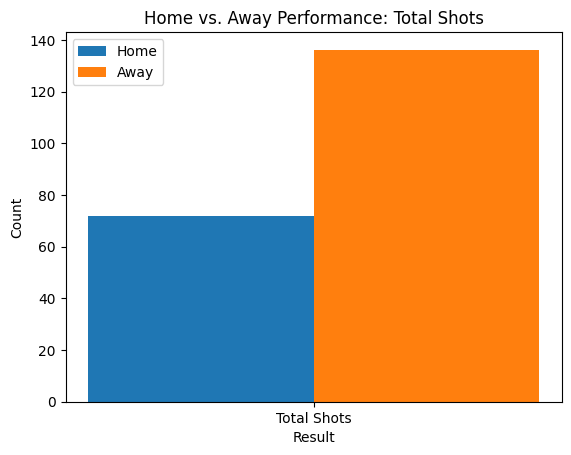

In [91]:
# shots on target metrics: home vs away
# define labels and data
labels = ['Total Shots']
home_data = home_shots
away_data = away_shots

fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35
bar_positions_home = range(len(labels))
bar_positions_away = [pos + bar_width for pos in bar_positions_home]

ax.bar(bar_positions_home, home_data, width=bar_width, label='Home')
ax.bar(bar_positions_away, away_data, width=bar_width, label='Away')

# Adding labels and title
ax.set_xlabel('Result')
ax.set_ylabel('Count')
ax.set_title('Home vs. Away Performance: Total Shots')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_home])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

In [94]:
print(percent_home_shots_on_target*100)
print(percent_away_shots_on_target*100)

12.97635605006954
12.161440960640427
